In [1]:
import pymc as pm
import arviz as az

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from thesis_tools.models.frequentist import *
from thesis_tools.utils.data import *

In [3]:
df = pd.DataFrame()
df['year'] = list(range(20))
df['group'] = 'Rotterdam'
df['alpha'] = 1.0
df['constant'] = 1
df['x_2'] = np.random.normal(0, 1, len(df))
df['x_3'] = np.random.normal(0, 1, len(df))
df['epsilon'] = np.random.normal(0, 0.1, len(df))

const_coef = 0
x_2_coef = 1
x_3_coef = 1

for i in range(1, len(df)):
    df.loc[i, 'alpha'] = df.loc[i-1, 'alpha']*np.exp(
        const_coef * df.loc[i, 'constant'] + x_2_coef * df.loc[i, 'x_2'] + x_3_coef * df.loc[i, 'x_3'] + df.loc[i, 'epsilon']
    )

def generate_random_y(row):
    alpha = row['alpha']
    return Pareto(alpha=alpha).sample(50)

df['y_data'] = df.apply(generate_random_y, axis=1)


/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_tools/models/frequentist.py:122: RuntimeWarning: overflow encountered in power
  return x_m * (1 - p)**(-alpha)


In [11]:
df = read_panel_data(observations_threshold=50)
df = df[df['group'] == 'U.S.']
df = df.tail(15)

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_tools/utils/data.py:249: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_FTSE100['Date'] = pd.to_datetime(df_FTSE100['Date'])


In [12]:
df

,group,year,gdp_pc,CAC40,DAX,FTSE100,MOEX,MSCI,NIFTY,OMX40,...,log_change_CAC40,log_change_DAX,log_change_FTSE100,log_change_MOEX,log_change_MSCI,log_change_NIFTY,log_change_OMX40,log_change_SPX,log_change_SSE,constant
113,U.S.,2009,47194.943355,2973.919922,4338.350098,4149.64,NaN,838.799988,2874.800049,NaN,...,-0.493170,-0.457010,-0.348498,NaN,-0.572140,-0.580574,NaN,-0.512338,-0.789358,1
114,U.S.,2010,48650.643128,3739.459961,5608.790039,5188.52,NaN,1119.500000,4882.049805,NaN,...,0.229060,0.256841,0.223427,NaN,0.288665,0.529582,NaN,0.262575,0.406572,1
115,U.S.,2011,50065.966504,4005.500000,7077.479980,5862.94,NaN,1331.699951,5505.899902,NaN,...,0.068727,0.232583,0.122203,NaN,0.173574,0.120255,NaN,0.180361,-0.068746,1
116,U.S.,2012,51784.418574,3298.550049,6458.910156,5681.61,NaN,1273.699951,5199.250000,NaN,...,-0.194185,-0.091457,-0.031417,NaN,-0.044530,-0.057306,NaN,0.020235,-0.196599,1
117,U.S.,2013,53291.127689,3732.600098,7776.049805,6276.88,NaN,1416.800049,6034.750000,NaN,...,0.123622,0.185588,0.099638,NaN,0.106475,0.149020,NaN,0.132339,0.039685,1
118,U.S.,2014,55123.849787,4165.720215,9306.480469,6510.44,1454.050049,1598.500000,6089.500000,NaN,...,0.109784,0.179663,0.036534,NaN,0.120665,0.009032,NaN,0.173863,-0.159823,1
119,U.S.,2015,56762.729452,4604.250000,10694.320313,6749.40,1647.689941,1677.500000,8808.900391,1506.40,...,0.100091,0.139002,0.036047,0.125021,0.048239,0.369197,NaN,0.112572,0.456831,1
120,U.S.,2016,57866.744934,4417.020020,9798.110352,6083.79,1784.920044,1562.199951,7563.549805,1472.30,...,-0.041515,-0.087523,-0.103826,0.079999,-0.071210,-0.152422,-0.022897,-0.027827,-0.159302,1
121,U.S.,2017,59907.754261,4748.899902,11535.309570,7099.15,2217.389893,1805.500000,8561.299805,1493.35,...,0.072448,0.163223,0.154347,0.216957,0.144743,0.123911,0.014196,0.160868,0.143226,1
122,U.S.,2018,62823.309438,5481.930176,13189.480469,7533.55,2289.989990,2171.500000,11027.700195,1594.35,...,0.143544,0.134007,0.059391,0.032217,0.184581,0.253158,0.065444,0.214407,0.096964,1


In [13]:
df.columns

Index(['group', 'year', 'gdp_pc', 'CAC40', 'DAX', 'FTSE100', 'MOEX', 'MSCI',
       'NIFTY', 'OMX40', 'SPX', 'SSE', 'net_worth', 'N_net_worth',
       'log_change_gdp_pc', 'log_change_CAC40', 'log_change_DAX',
       'log_change_FTSE100', 'log_change_MOEX', 'log_change_MSCI',
       'log_change_NIFTY', 'log_change_OMX40', 'log_change_SPX',
       'log_change_SSE', 'constant'],
      dtype='object')

In [14]:
# model = pm.Model()

# # y_column = 'net_worth'
# # covariate_names = ['constant', 'log_change_gdp_pc', 'log_change_DAX']

# y_column = 'y_data'
# covariate_names = ['constant', 'x_2', 'x_3']

# with model:    
#     betas = []
#     for cov in covariate_names:
#         beta_variance = pm.Gamma(f'beta_variance_{cov}', alpha=1, beta=1)
#         betas.append(pm.Normal(f'beta_{cov}', mu=0, sigma=beta_variance))

#     T = len(df)
#     X = df[covariate_names].values
#     epsilon_alpha = pm.Gamma('epsilon_alpha', alpha=1, beta=1)
#     initial_one_over_alpha = pm.Gamma(f'one_over_alpha_{0}', alpha=1, beta=1) 
#     initial_alpha = pm.Deterministic(f'alpha_{0}', 1/initial_one_over_alpha)
#     one_over_alphas = [initial_one_over_alpha]
#     alphas = [initial_alpha]
#     for t in range(1, T):
#         epsilon = pm.Normal(f'epsilon_{t}', mu=0, sigma=epsilon_alpha)
#         #epsilon = 0
#         one_over_alpha = pm.Deterministic(
#             f'one_over_alpha_{t}', 
#             one_over_alphas[-1] / pm.math.exp(pm.math.dot(X[t], betas) + epsilon)
#         )
#         # sigmas.append(sigmas[-1] * pm.math.exp(pm.math.dot(X[t], betas)) + epsilon)
#         alpha = pm.Deterministic(f'alpha_{t}', 1 / one_over_alpha)
#         one_over_alphas.append(one_over_alpha)
#         alphas.append(alpha)

#     y_obs = []
#     for t in range(T):
#         y_obs.append(
#             pm.Pareto(
#                 f'y_{t}', 
#                 alpha=one_over_alphas[t], 
#                 m = 1.0,
#                 observed=df.iloc[t][y_column])
#         )

In [15]:
df = df.set_index('year')

In [16]:
model = pm.Model()

y_column = 'net_worth'
covariate_names = ['constant', 'log_change_gdp_pc', 'log_change_SPX']

# y_column = 'y_data'
# covariate_names = ['constant', 'x_2', 'x_3']

with model:    
    betas = []
    for cov in covariate_names:
        beta_variance = pm.Gamma(f'beta_variance_{cov}', alpha=1, beta=1)
        betas.append(pm.Normal(f'beta_{cov}', mu=0, sigma=beta_variance))

    years = df.index.values
    X = df[covariate_names] #.values

    initial_one_over_alpha = pm.Gamma(f'one_over_alpha_{years[0]}', alpha=41, beta=44) 
    initial_alpha = pm.Deterministic(f'alpha_{years[0]}', 1/initial_one_over_alpha)
    one_over_alphas = {years[0]: initial_one_over_alpha}
    alphas = {years[0]: initial_alpha}

    epsilon_alpha = pm.Gamma('epsilon_alpha', alpha=1, beta=1)
    for year in years[1:]:
        epsilon = pm.Normal(f'epsilon_{year}', mu=0, sigma=epsilon_alpha)
        one_over_alpha = pm.Deterministic(
            f'one_over_alpha_{year}', 
            one_over_alphas[year-1] / pm.math.exp(pm.math.dot(X.loc[year], betas) + epsilon)
        )
        alpha = pm.Deterministic(f'alpha_{year}', 1 / one_over_alpha)
        one_over_alphas[year] = one_over_alpha
        alphas[year] = alpha

    y_obs = []
    for year in years:
        y_obs.append(
            pm.Pareto(
                f'y_{year}', 
                alpha=one_over_alphas[year], 
                m = 1.0,
                observed=df.loc[year][y_column])
        )

In [18]:
with model:
    trace = pm.sample(2000, tune=2000, nuts_sampler='pymc', chains=4, cores=4, target_accept=0.975, jitter_max_retries=100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


SamplingError: Initial evaluation of model at starting point failed!
Starting values:
{'beta_variance_constant_log__': array(0.96408533), 'beta_constant': array(-0.05174489), 'beta_variance_log_change_gdp_pc_log__': array(-0.24501119), 'beta_log_change_gdp_pc': array(0.6370171), 'beta_variance_log_change_SPX_log__': array(0.476324), 'beta_log_change_SPX': array(-0.34042311), 'one_over_alpha_2009_log__': array(-0.57488449), 'epsilon_alpha_log__': array(0.77594095), 'epsilon_2010': array(0.99311335), 'epsilon_2011': array(-0.85569632), 'epsilon_2012': array(0.62388222), 'epsilon_2013': array(0.29682456), 'epsilon_2014': array(-0.2157928), 'epsilon_2015': array(-0.72987551), 'epsilon_2016': array(0.71623334), 'epsilon_2017': array(0.57168834), 'epsilon_2018': array(0.46128305), 'epsilon_2019': array(0.19500969), 'epsilon_2020': array(-0.18385591), 'epsilon_2021': array(-0.77862584), 'epsilon_2022': array(-0.25610272), 'epsilon_2023': array(0.78788754)}

Logp initial evaluation results:
{'beta_variance_constant': -1.66, 'beta_constant': -1.88, 'beta_variance_log_change_gdp_pc': -1.03, 'beta_log_change_gdp_pc': -1.01, 'beta_variance_log_change_SPX': -1.13, 'beta_log_change_SPX': -1.42, 'one_over_alpha_2009': -3.5, 'epsilon_alpha': -1.4, 'epsilon_2010': -1.8, 'epsilon_2011': -1.77, 'epsilon_2012': -1.74, 'epsilon_2013': -1.7, 'epsilon_2014': -1.7, 'epsilon_2015': -1.75, 'epsilon_2016': -1.75, 'epsilon_2017': -1.73, 'epsilon_2018': -1.72, 'epsilon_2019': -1.7, 'epsilon_2020': -1.7, 'epsilon_2021': -1.76, 'epsilon_2022': -1.7, 'epsilon_2023': -1.76, 'y_2009': -584.92, 'y_2010': -994.9, 'y_2011': -808.21, 'y_2012': -994.98, 'y_2013': -1138.18, 'y_2014': -1214.37, 'y_2015': -1160.17, 'y_2016': -1259.47, 'y_2017': -inf, 'y_2018': -1813.43, 'y_2019': -1939.96, 'y_2020': -1756.15, 'y_2021': -1812.19, 'y_2022': -1796.08, 'y_2023': -2064.87}
You can call `model.debug()` for more details.

In [19]:
model.debug()

point={'beta_variance_constant_log__': array(0.), 'beta_constant': array(0.), 'beta_variance_log_change_gdp_pc_log__': array(0.), 'beta_log_change_gdp_pc': array(0.), 'beta_variance_log_change_SPX_log__': array(0.), 'beta_log_change_SPX': array(0.), 'one_over_alpha_2009_log__': array(-0.07061756), 'epsilon_alpha_log__': array(0.), 'epsilon_2010': array(0.), 'epsilon_2011': array(0.), 'epsilon_2012': array(0.), 'epsilon_2013': array(0.), 'epsilon_2014': array(0.), 'epsilon_2015': array(0.), 'epsilon_2016': array(0.), 'epsilon_2017': array(0.), 'epsilon_2018': array(0.), 'epsilon_2019': array(0.), 'epsilon_2020': array(0.), 'epsilon_2021': array(0.), 'epsilon_2022': array(0.), 'epsilon_2023': array(0.)}

The variable y_2017 has the following parameters:
0: Exp [id A] <Scalar(float64, shape=())> 'one_over_alpha_2017'
 └─ Sub [id B] <Scalar(float64, shape=())>
    ├─ Sub [id C] <Scalar(float64, shape=())>
    │  ├─ Sub [id D] <Scalar(float64, shape=())>
    │  │  ├─ Sub [id E] <Scalar(floa

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (71), generating only 20 plots
  warnings.warn(


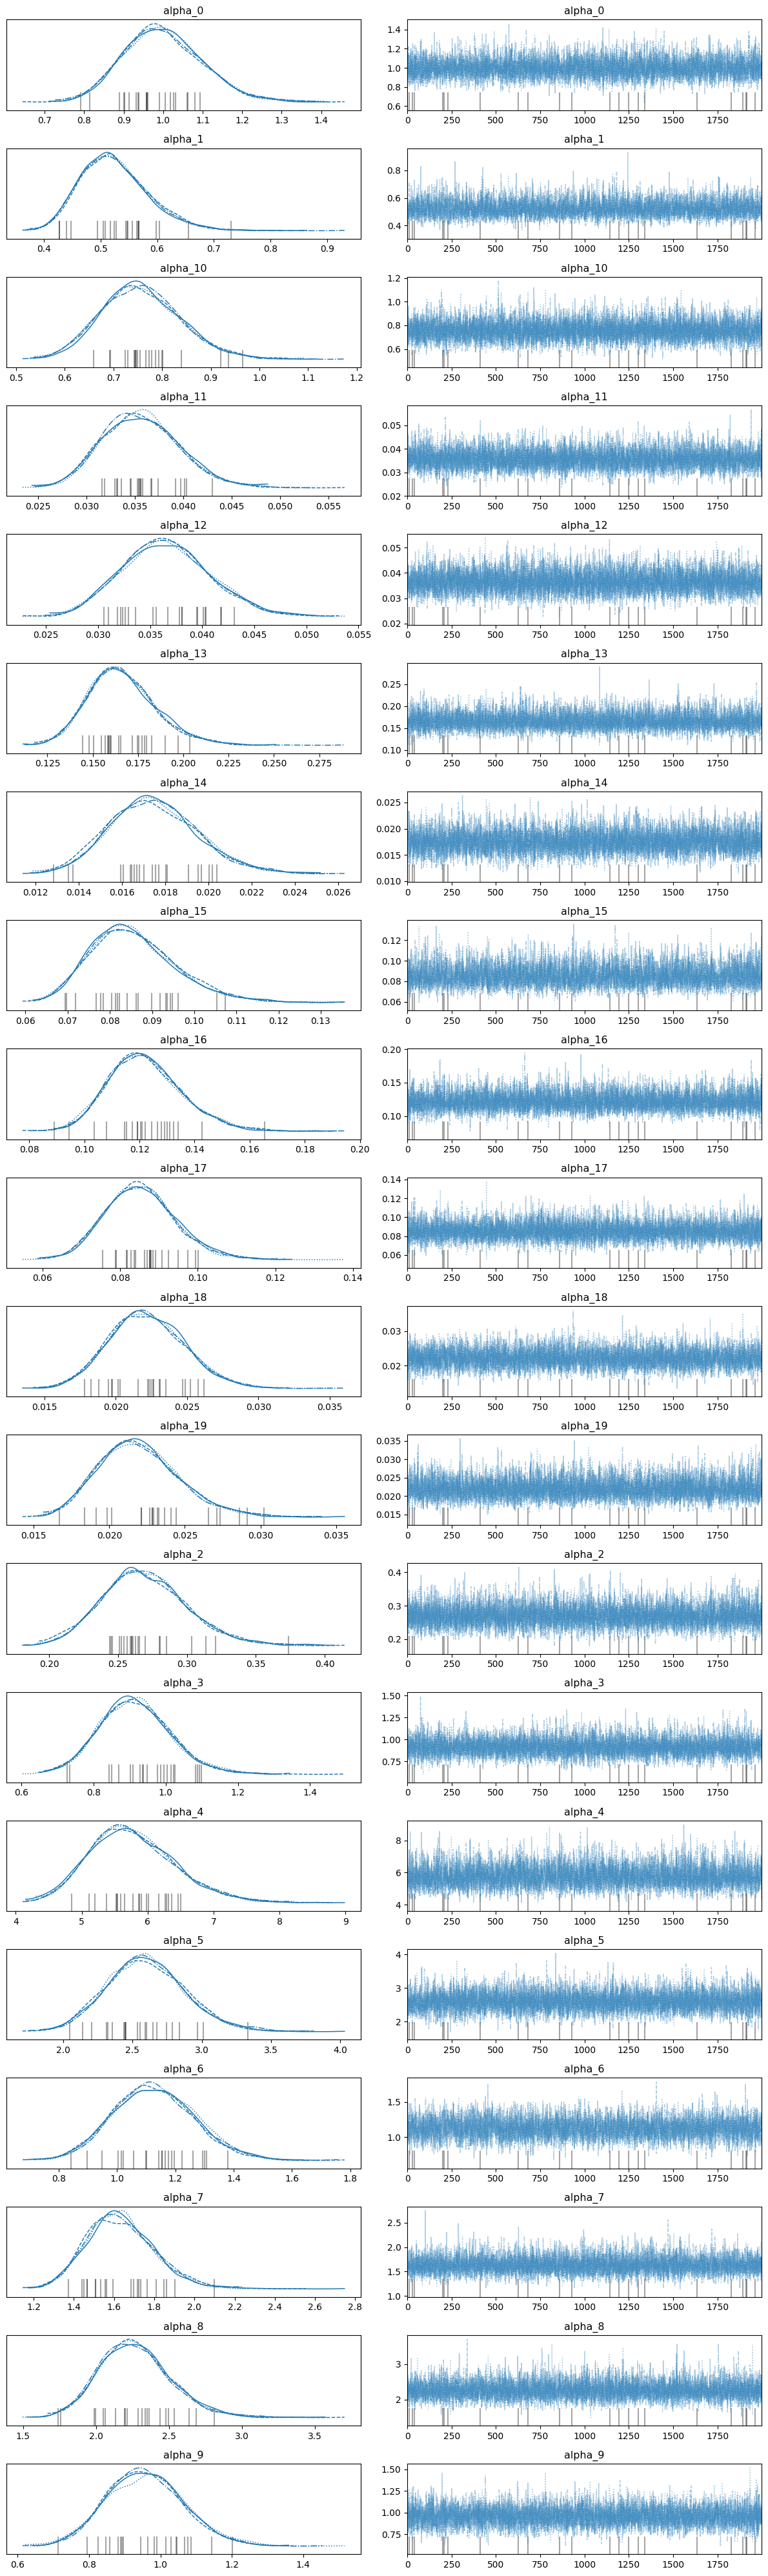

In [ ]:
az.plot_trace(trace)
plt.tight_layout()

In [ ]:
summary = az.summary(trace, stat_focus='median')
summary

,median,mad,eti_3%,eti_97%,mcse_median,ess_median,ess_tail,r_hat
alpha_0,0.994,0.066,0.829,1.198,0.001,5484.822,5632.0,1.0
alpha_1,0.519,0.039,0.429,0.651,0.001,5068.938,5996.0,1.0
alpha_10,0.752,0.055,0.613,0.923,0.001,9124.632,7177.0,1.0
alpha_11,0.035,0.003,0.029,0.044,0.000,8249.322,6644.0,1.0
alpha_12,0.036,0.003,0.029,0.045,0.000,7351.597,6947.0,1.0
...,...,...,...,...,...,...,...,...
one_over_alpha_5,0.387,0.028,0.316,0.476,0.001,8247.877,6547.0,1.0
one_over_alpha_6,0.890,0.074,0.717,1.136,0.002,4563.685,6555.0,1.0
one_over_alpha_7,0.617,0.042,0.505,0.743,0.001,9253.053,6640.0,1.0
one_over_alpha_8,0.444,0.031,0.360,0.539,0.001,8791.044,6723.0,1.0


In [ ]:
with model:
    ppc = pm.sample_posterior_predictive(trace)

Sampling: [y_0, y_1, y_10, y_11, y_12, y_13, y_14, y_15, y_16, y_17, y_18, y_19, y_2, y_3, y_4, y_5, y_6, y_7, y_8, y_9]


Output()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/arviz/plots/plot_utils.py:272: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (1000) in plot_posterior, generating only 40 plots
  warnings.warn(


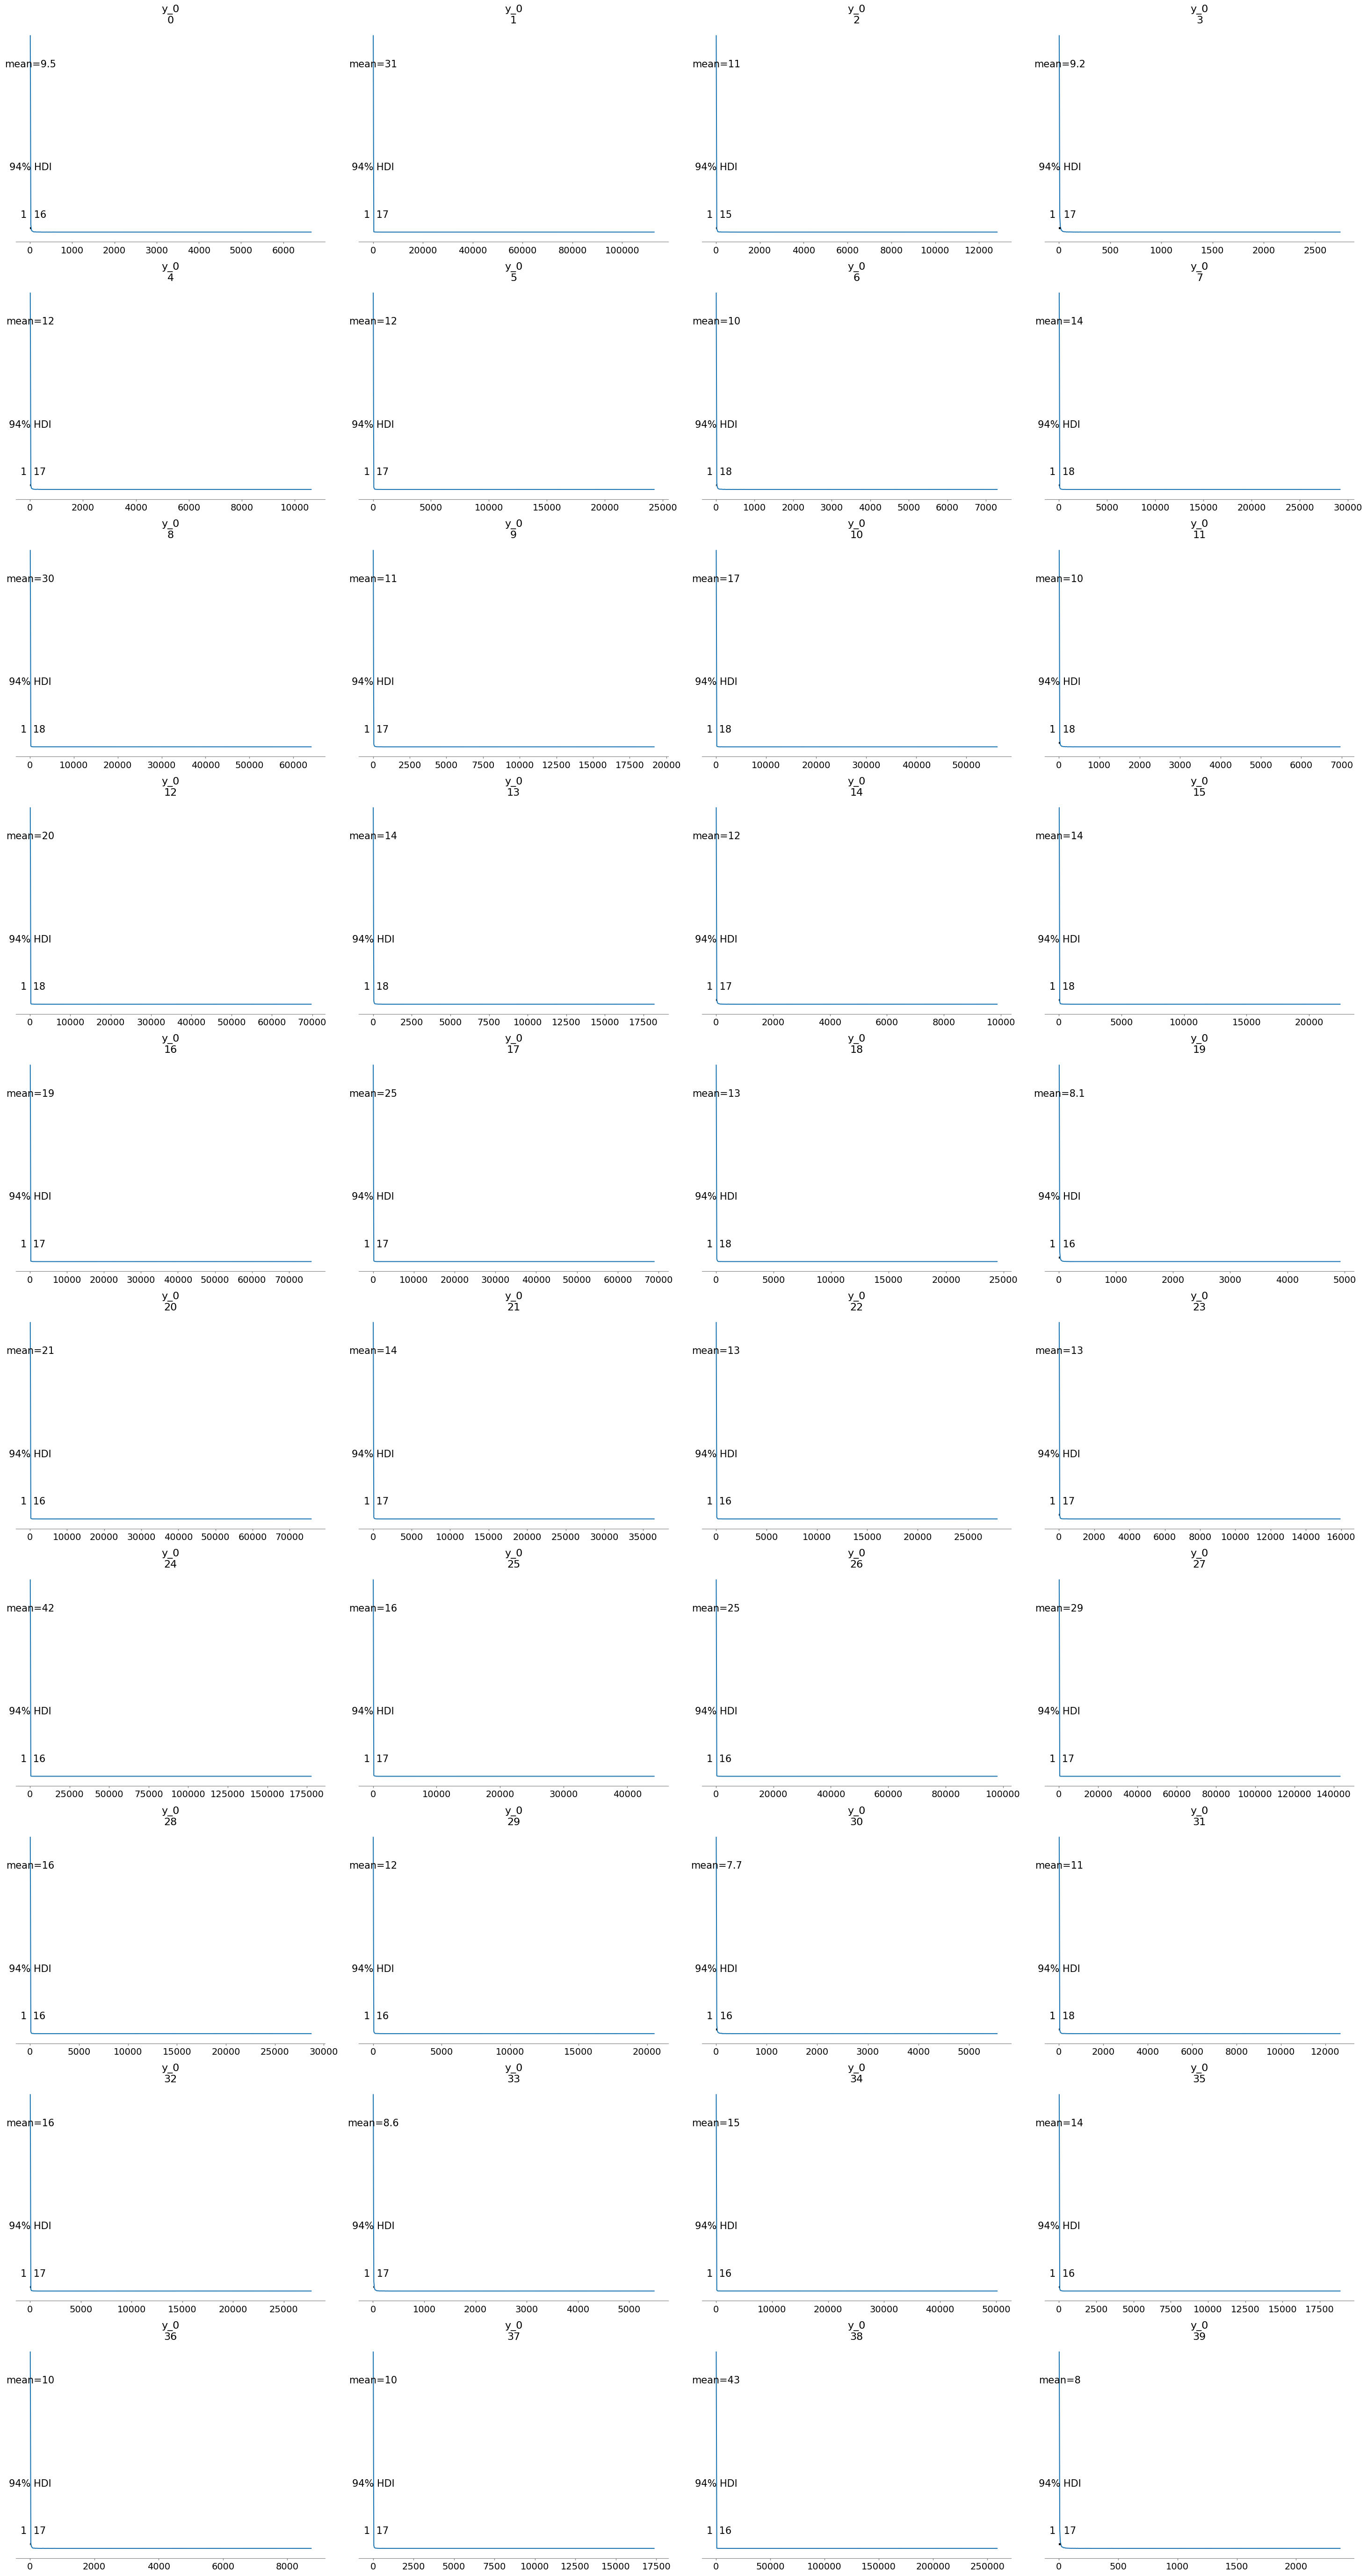

In [ ]:
az.plot_posterior(ppc['posterior_predictive'])
plt.tight_layout()

In [ ]:
y_post = ppc['posterior_predictive']['y_1997'].values.flatten()

KeyError: "No variable named 'y_1997'. Variables on the dataset include ['chain', 'draw', 'y_0_dim_2', 'y_0', 'y_1_dim_2', ..., 'y_7', 'y_8_dim_2', 'y_8', 'y_9_dim_2', 'y_9']"

In [ ]:
log_y_post = np.log(y_post)

(array([4.4493e+04, 3.4298e+04, 2.6612e+04, 2.0709e+04, 1.6109e+04,
        1.2636e+04, 9.9620e+03, 7.5710e+03, 5.9920e+03, 4.6720e+03,
        3.6110e+03, 2.7570e+03, 2.3170e+03, 1.8340e+03, 1.3680e+03,
        1.0540e+03, 9.0700e+02, 6.2700e+02, 4.9900e+02, 3.9700e+02,
        3.1200e+02, 2.6300e+02, 2.1300e+02, 1.6400e+02, 1.1300e+02,
        9.0000e+01, 7.8000e+01, 8.2000e+01, 4.7000e+01, 4.7000e+01,
        3.8000e+01, 2.9000e+01, 1.7000e+01, 2.0000e+01, 1.2000e+01,
        1.2000e+01, 8.0000e+00, 8.0000e+00, 4.0000e+00, 1.0000e+00,
        2.0000e+00, 3.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.03751708e-06, 2.79514384e-01, 5.59027730e-01, 8.38541077e-01,
        1.11805442e+00, 1.39756777e+00, 1.67708112e+00, 1.95659446e+00,
        2.23610781e+00, 2.51562115e+00, 2.79513450e+00, 3.07464785e+00,
        3.35416119e+00, 3.63367454e+00, 3.91318789e+00, 4.19270123e+00,
        4.47221458e+00, 4.7517

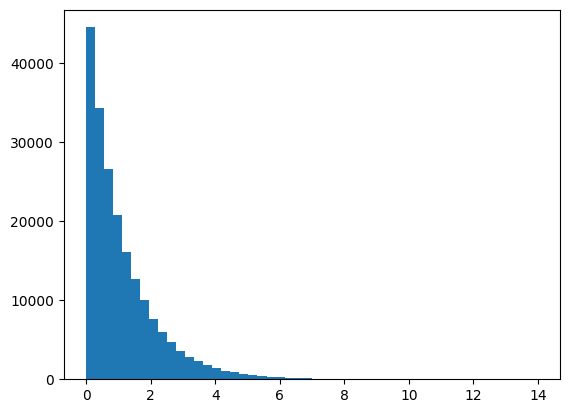

In [ ]:
plt.hist(log_y_post, bins=50)